# Module 5: Natural Language Processing With spaCy

## Table of Contents
<br>
<a href="#Module 4: Natural Language Processing With spaCy"><font size="+1">Module 4: Natural Language Processing With spaCy
</font></a>
<ol>
  <li>What’s spaCy?</li>
  <li>Spacy - Tokenisation</li>
  <li>Spacy - Checks</li>
  <li>Rule-Based Matching using spaCy</li>
  <li>Spacy - Stopwords</li>
  <li>Spacy - Remove punctuation</li>
  <li>Spacy - Remove Numbers</li>
  <li>Spacy - Sentence Detection</li>
  <li>Spacy - Lemmatization</li>
  <li>Spacy - Part of Speech Tagging </li>
  <li>Spacy - Shallow Parsing</li>
  <li>Spacy - Named Entity</li>
  <li>spaCy - Dependency Parsing </li>  
    
</ol>

The code below uses the patents dataset to demonstrate how to undertake key NLP tasks using spacy. 

**Learning Outcomes:** 

Perform the following operations on text using the spaCy library:-


* Execute tokenisation
* Remove stopwords
* Remove punctuation
* Remove numbers
* Identify sentences
* Execute Lemmatization
* Execute Part of speech tagging
* Execute Shallow parsing or chunking
* Execute Named entity recognition
* Execute Dependency parsing

Additionally you should be able to:

* Provide a brief desciption on the spaCy library
<br>


## 5.1 What is spaCy?
<br>

spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

spaCy is designed specifically for **production use** and helps you build applications that process and “understand” large volumes of text. It can be used to build **information extraction** or natural language understanding systems, or to **pre-process** text for deep learning.

spaCy provides a variety of linguistic annotations to give you insights into a text’s grammatical structure. This includes the word types, like the parts of speech, and how the words are related to each other. For example, if you’re analyzing text, it makes a huge difference whether a noun is the subject of a sentence, or the object – or whether “google” is used as a verb, or refers to the website or company in a specific context. (from official spaCy documentation - link below)
<br>
<br>

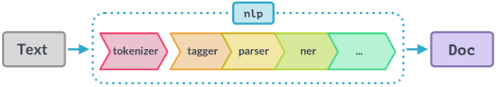

<br>


When you call nlp on a text, spaCy first tokenizes the text to produce a **Doc** object. The Doc is then processed in several different steps – this is also referred to as the **processing pipeline**. The pipeline used by the default models consists of a tagger, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.


In [ ]:
# Import libraries

In [ ]:
import spacy
import pandas as pd
from spacy.matcher import Matcher
from spacy import displacy

In [ ]:
# Load the language model instance in spaCy locally
nlp = spacy.load('../pre_course/spacy/small_practice_model/en_core_web_sm-2.3.1')

# Create an nlp object
doc = nlp("Balo walked to school. She met several friends at the school gate")

In [ ]:
# We can view the active pipeline components
nlp.pipe_names

In [ ]:
# Read in dataframe to process the abstract column
patents = pd.read_pickle('../data/Patent_Dataset.pkl')

In [ ]:
patents.shape

In [ ]:
patents.sample(5)

During processing, spaCy first tokenizes the text, i.e. segments it into words, punctuation and so on.

## 5.2 Spacy - Tokenisation

During processing, spaCy first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language. 

In [ ]:
def token_spacy(pdoc):
    pdoc = nlp(pdoc)
    return [token.text for token in pdoc]

In [ ]:
patents['token_spacy'] = patents['abstract'].apply(token_spacy)

In [ ]:
patents.head()

## 5.3 Spacy - Checks

<ul>
    <li><b>text_with_ws</b> prints token text with trailing space (if present)</li>
    <li><b>is_alpha</b> detects if the token consists of alphabetic characters or not</li>
    <li><b>is_punct</b> detects if the token is a punctuation symbol or not</li>
    <li><b>is_space</b> detects if the token is a space or not.</li>
    <li><b>shape</b> prints out the shape of the word</li>
    <li><b>is_stop</b> detects if the token is a stop word or not.</li>
</ul>

In [ ]:
text = nlp("There is a green hill far away. It is in a land I heard in a lullaby")


for token in text:
    print(token, token.idx, token.text_with_ws,
          token.is_alpha, token.is_punct, token.is_space,
          token.shape_, token.is_stop, "\n")


## 5.4 Rule-Based Matching using spaCy

Find words and phrases in the text using user-defined rules. It is like Regular Expressions.

Match patterns
Lists of dictionaries, one per token

```{python}
#Match exact token texts
[{"TEXT": "iPhone"}, {"TEXT": "X"}]

#Match lexical attributes
[{"LOWER": "iphone"}, {"LOWER": "x"}]

#Match any token attributes
[{"LEMMA": "buy"}, {"POS": "NOUN"}]
```


spaCy POS tags  shown here: https://spacy.io/api/annotation

In [ ]:
# Import the Matcher
from spacy.matcher import Matcher

# Load a model and create the nlp object
nlp = spacy.load('../pre_course/spacy/small_practice_model/en_core_web_sm-2.3.1')

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", None, pattern)

# Process some text
doc = nlp("Upcoming iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)

In [ ]:
print(matches)

The output has three elements. 

The first element, ‘9528407286733565721’, is the match ID.

The second and third elements are the positions of the matched tokens.

In [ ]:
from spacy.matcher import Matcher

text = nlp('Gus Proto is a Python developer currently working for a London-based Fintech company. He is interested in learning Natural Language Processing.')

matcher = Matcher(nlp.vocab)

def extract_full_name(nlp_doc):
    
    pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
    matcher.add('FULL_NAME', None, pattern)
    matches = matcher(nlp_doc)
    allmatches = []
    for match_id, start, end in matches:
        span = nlp_doc[start:end]
        allmatches.append(span)
    
    return allmatches


print(extract_full_name(text))

In [ ]:
# Call the matcher on the doc
doc = nlp("Upcoming iPhone X release date leaked")
matches = matcher(doc)

# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

**match_id**: hash value of the pattern name

**start**: start index of matched span

**end**: end index of matched span

### Another example:

Consider the two sentences below:

*You can read this book* <br>
*I will book my ticket* <br>
<br>
Does a sentence contains the word “book” in it or not. 
Looking to find the word “book” only if it has been used in the sentence as a noun.
<br>


In [ ]:
doc1 = nlp("You read this book")
doc2 = nlp("I will book my ticket")

pattern = [{'TEXT': 'book', 'POS': 'NOUN'}]

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)
matcher.add('rule_2', None, pattern)


In [ ]:
matches = matcher(doc1)
matches

In [ ]:
matches = matcher(doc2)
matches

In the first sentence above, “book” has been used as a noun and in the second sentence, it has been used as a verb. So, the spaCy matcher should be able to extract the pattern from the first sentence only. 

In [ ]:
nlp = spacy.load('../pre_course/spacy/small_practice_model/en_core_web_sm-2.3.1')
matcher = Matcher(nlp.vocab)

doc = nlp(
    "Features of the app include a beautiful design, smart search, automatic "
    "labels and optional voice responses."
    )

# Write a pattern for adjective plus one or two nouns
pattern = [{"POS": "ADJ"}, {"POS": "NOUN"}, {"POS": "NOUN", "OP": "?"}]


# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("ADJ_NOUN_PATTERN", None, pattern)
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

## 5.5 Spacy - Stopwords

Stop words are the most common words in a language.
Most sentences need to contain stop words in order to be full sentences that make sense.
Stop words are removed because they aren’t significant and distort the word frequency analysis. 
spaCy has a list of stop words for the English language (Singh, 2019)

In [ ]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Spacy has', len(spacy_stopwords), 'stopwords')

# Display the first 10 stopwords spaCy has
for stop_word in list(spacy_stopwords)[:10]:
    print(stop_word)

In [ ]:
def stopword_spacy(pdoc):
    pdoc = nlp(pdoc)
    text = " ".join([str(token) for token in pdoc if not token.is_stop])
    return text

In [ ]:
patents['preprocess_spacy'] = patents['abstract'].apply(stopword_spacy)

## 5.6 Spacy - Remove punctuation

In [ ]:
def punctuation_spacy(pdoc):
    pdoc = nlp(pdoc)
    text = ""
    for token in pdoc:
        if not token.is_punct:
            text = text + " " + str(token)
    return text

In [ ]:
patents['preprocess_spacy'] = patents['preprocess_spacy'].apply(punctuation_spacy)

In [ ]:
patents.head()

## 5.7 Spacy - Remove Numbers

In [ ]:
def nonumbers_spacy(pdoc):
    pdoc = nlp(pdoc)
    text = ""
    for token in pdoc:
        if token.is_alpha:
            text = text + " " + str(token)
    return text

In [ ]:
patents['preprocess_spacy'] = patents['preprocess_spacy'].apply(nonumbers_spacy)

In [ ]:
patents.head()

## 5.8 Spacy - Sentence Detection
<br>

Sentence Detection is the process of locating the start and end of sentences in a given text. This separates the text into linguistically meaningful units. In spaCy, the **sents** property is used to extract sentences. 

In [ ]:
text = nlp("There is a green hill far away. It is in a land I heard in a lullaby")
sentences = list(text.sents)

for sentence in sentences:
    print(sentence, type(sentence))

In [ ]:
def sentence_spacy(pdoc):
    pdoc = nlp(pdoc)
    psentences = list(pdoc.sents)
    return [sentence for sentence in psentences]

In [ ]:
patents['sentence_spacy'] = patents['abstract'].apply(sentence_spacy)

In [ ]:
patents.head()

In [ ]:
patents.iloc[1,5]

## 5.9 Spacy - Lemmatization


**Lemmatization** is the process of reducing inflected forms of a word while still ensuring that the reduced form belongs to the language. This reduced form or root word is called a **lemma**.

Lemmatization is necessary because it helps you reduce the inflected forms of a word so that they can be analyzed as a single item. It can also help you normalize the text. (Singh, 2019)

In [ ]:
def lemmatization_spacy(pdoc):
    
    pdoc =  nlp(pdoc)
    text  = ""
    
    for token in pdoc:
        text = text + " " + str(token.lemma_)
            
    return text

In [ ]:
patents['preprocess_spacy'] = patents['preprocess_spacy'].apply(lemmatization_spacy)

In [ ]:
patents['preprocess_spacy']

## 5.10 Spacy - Part of Speech Tagging 

Part of speech or POS is a grammatical role that explains how a particular word is used in a sentence.
<br>

**Part of speech tagging** is the process of **assigning a POS tag**  to each token depending on its usage in the sentence. POS tags are useful for assigning a syntactic category like noun or verb to each word.
<br>

In spaCy, POS tags are available as an attribute on the Token object

In [ ]:
text = nlp("Algebra can essentially be considered as doing computations\
            similar to those of arithmetic but with non-numerical mathematical objects. \
            However, until the 19th century, algebra consisted essentially of the theory \
            of equations")

In [ ]:
for token in text:
    print(token, token.tag_, token.pos_, spacy.explain(token.tag_), "\n")

In [ ]:
def pos_spacy(pdoc):
    
    pdoc = nlp(pdoc)
    pos = []
    
    for token in pdoc:
        pos.append([token.text, "-->", token.pos_])
 
    return pos

In [ ]:
patents['pos_spacy'] = patents['abstract'].apply(pos_spacy)

In [ ]:
patents['pos_spacy']

## 5.11 Spacy - Shallow Parsing

**Shallow parsing, or chunking**, is the process of extracting phrases from unstructured text. Chunking groups adjacent tokens into phrases on the basis of their POS tags. There are some standard well-known chunks such as **noun phrases, verb phrases, and prepositional phrases.**

Noun chunks example shown - to view example of verb phrase extraction see example at 
https://realpython.com/natural-language-processing-spacy-python/

In [ ]:
# Code below extracted from https://realpython.com/natural-language-processing-spacy-python/
text = ('There is a developer conference happening on 21 July 2019 in London.')
text = nlp(text)

# Extract Noun Phrases
for chunk in text.noun_chunks:
    print(chunk)

In [ ]:
def nounchunk_spacy(pdoc):
    
    pdoc =  nlp(pdoc)
    noun_chunks  = []
    
    for chunk in pdoc.noun_chunks:
        noun_chunks.append(chunk)
        
    return noun_chunks

In [ ]:
patents['noun_chunks_spacy'] = patents['abstract'].apply(nounchunk_spacy)

In [ ]:
patents.head()

## 5.12 Spacy - Named Entity

**Named Entity Recognition (NER)** is the process of locating named entities in unstructured text and then classifying them into pre-defined categories, such as person names, organizations, locations, monetary values, percentages, time expressions, and so on.


spaCy has the property ents on Doc objects. You can use it to extract named entities:

In [ ]:
# example taken from https://realpython.com/natural-language-processing-spacy-python/
text = ('Great Piano Academy is situated in Mayfair or the City of London and has world-class piano instructors.')

text = nlp(text)

for entity in text.ents:
    print(entity.text, entity.start_char, entity.end_char, entity.label_, spacy.explain(entity.label_))


In [ ]:
def ne_spacy(pdoc):
    
    pdoc =  nlp(pdoc)
    named_entities  = []
    
    for entity in pdoc.ents:
        named_entities.append([entity.text, "--->", entity.label_] )
        
    return named_entities

In [ ]:
patents['ne_spacy'] = patents['abstract'].apply(ne_spacy)

In [ ]:
patents.head()

In [ ]:
patents.loc[0, 'ne_spacy']

## 5.13 spaCy - Dependency Parsing 

**Dependency parsing** is the process of extracting the dependency parse of a sentence to represent its grammatical structure. It defines the dependency relationship between **headwords and their dependents**. The head of a sentence has no dependency and is called the **root** of the sentence. The verb is usually the head of the sentence. All other words are linked to the headword.

The dependencies can be mapped in a directed graph representation:
<br>
Words are the nodes.<br>
The grammatical relationships are the edges.<br>
Dependency parsing helps you know what role a word plays in the text and how different words relate to each other. It’s also used in shallow parsing and named entity recognition. (Singh,2019)
<br>
Here’s how you can use dependency parsing to see the relationships between words:

spaCy comes with a built-in visualizer called displaCy. You can use it to visualize a dependency parse or named entities in a browser or a Jupyter notebook.

You can use displaCy to find POS tags for tokens:


In [ ]:

about_interest_text = ('He is interested in learning natural Language Processing.')
about_interest_doc = nlp(about_interest_text)

displacy.serve(about_interest_doc, style='dep')

In [ ]:
## to contune hit the stop button

In [ ]:
# Example from https://realpython.com/natural-language-processing-spacy-python/
text = 'Gus is learning piano'
text = nlp(text)
for token in text:
    print(token.text, token.tag_, token.head.text, token.dep_)

In [ ]:
displacy.serve(text, style="ent")

The dependency tag ROOT denotes the main verb or action in the sentence. <br>
The other words are directly or indirectly connected to the ROOT word of the sentence. <br>
You can find out what other tags stand for by executing the code below:

In [ ]:
spacy.explain("nsubj"), spacy.explain("ROOT"), spacy.explain("aux"), spacy.explain("advcl"), spacy.explain("dobj")

In [ ]:
def depend_parse_spacy(pdoc):
    
    pdoc =  nlp(pdoc)
    de_parse  = []
    
    for token in pdoc:
        de_parse.append([token.text, "--->", token.dep_])
        
    return de_parse

In [ ]:
patents['de_parse_spacy'] = patents['abstract'].apply(depend_parse_spacy)

In [ ]:
patents.iloc[1,-1]

#### Exercises
<br>

<ol>
     <li>Import the Hep Dataset and  using spacy perform the steps listed below to the text column. Add new columns to hold         results of each operation</li>
    
            Tokenise
            Identify all phrases in column that have the pattern - adjective/noun.
            Remove all stopwords
            Remove all punctuation
            Remove all numbers
            Identify sentences
            Lemmatize the text
            Apply POS tagging
            Apply shallow parsing
            Apply Named Entity Recognition
            Apply Dependency Parsing
    
    
    
    
</ol>





#### References

https://spacy.io/usage/spacy-101 <br>
https://www.analyticsvidhya.com/blog/2020/03/spacy-tutorial-learn-natural-language-processing/ <br>
https://realpython.com/natural-language-processing-spacy-python/
